# Explaratory Data Analysis [Measure of Variability - Height Data]

Methods of measurement included: Variance, Standard Deviation, Skewness, Percentiles, and Ranges

## Data Preparation

#### Load package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

%matplotlib inline

## Gaussian Probability Distribution

#### Load dataset

In [3]:
# load csv data

df = pd.read_csv('height_weight.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
# add new column : Weight(Kg)

df['Weight(Kg)'] = df['Weight(Pounds)'] * 0.453592
df['Height(cm)'] = df['Height(Inches)'] * 2.54
df.head()

,Index,Height(Inches),Weight(Pounds),Weight(Kg),Height(cm)
0,1,65.78331,112.9925,51.252494,167.089607
1,2,71.51521,136.4873,61.909547,181.648633
2,3,69.39874,153.0269,69.411778,176.272800
3,4,68.21660,142.3354,64.562199,173.270164
4,5,67.78781,144.2971,65.452010,172.181037


In [5]:
# describe dataset

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Index,25000.0,12500.500000,7217.022701,1.000000,6250.750000,12500.500000,18750.250000,25000.000000
Height(Inches),25000.0,67.993114,1.901679,60.278360,66.704397,67.995700,69.272958,75.152800
Weight(Pounds),25000.0,127.079421,11.660898,78.014760,119.308675,127.157750,134.892850,170.924000
Weight(Kg),25000.0,57.642209,5.289290,35.386871,54.117461,57.677738,61.186318,77.529759
Height(cm),25000.0,172.702509,4.830264,153.107034,169.429170,172.709078,175.953312,190.888112


In [26]:
# set dataset
# we have to sort the value of x in accending order

x = df['Height(cm)']
x = x.sort_values()
mean = np.mean(x)
std_dev = np.std(x, ddof = 1)

#### Gaussian Probability Density Function

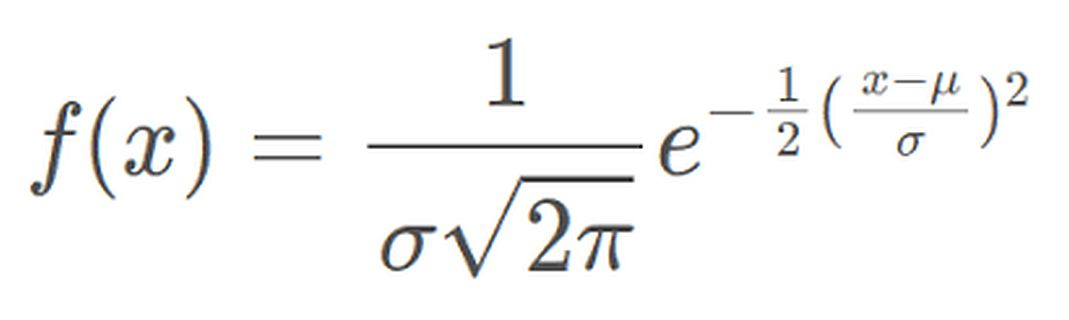

In [109]:
fx = np.exp(( -(x - mean) ** 2)/(2 * (std_dev ** 2)))/ ((2 * np.pi * std_dev ** 2) ** 0.5)

#### Plot graph

Text(0.5, 1.0, 'Normal Distribution')

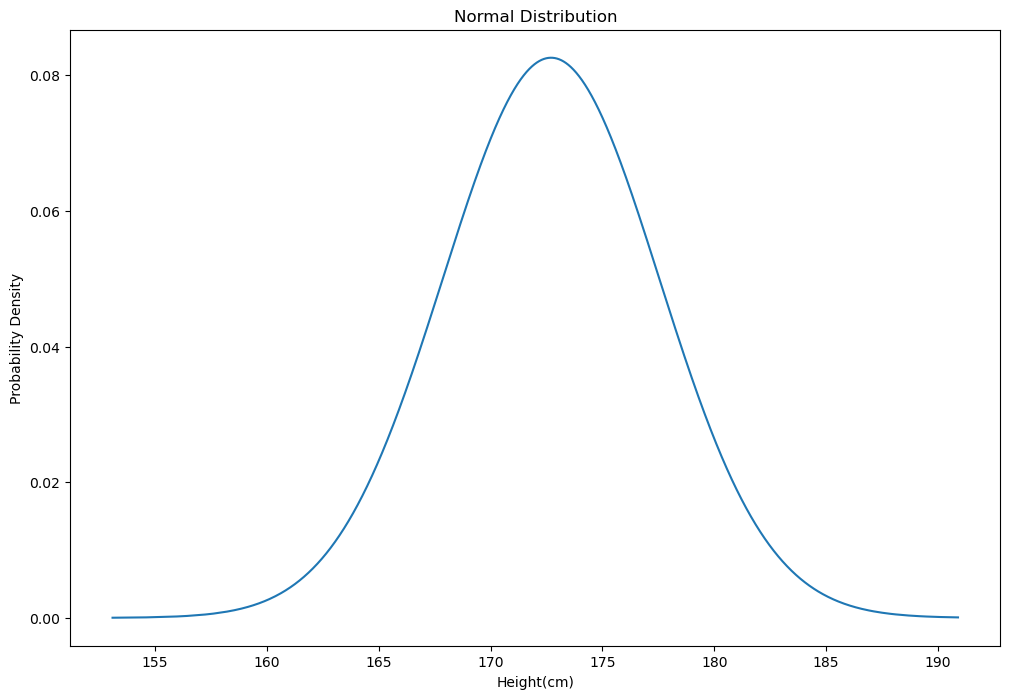

In [110]:
plt.figure(figsize = (12,8))
plt.plot(x,fx, alpha = 1) 
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')

#### Scipt.stats norm.ppf function

The method norm.ppf() takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at.\
The percent point function (ppf) calculates percentiles by taking the inverse of the cumulative distribution function (cdf). It has parameters such as the location (mean) and scale (standard deviation), which can be set to their default values of 0 and 1 respectively.

#### Example 1 : One-tailed test for 95% observations
Returns a 95% significance interval for a one-tail test on a standard normal distribution (i.e. a special case of the normal distribution where the mean is 0 and the standard deviation is 1).

This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% of data points would be contained if our data is a normal distribution.

In [36]:
stats.norm.ppf(0.95, loc=0, scale=1)

1.6448536269514722

 Uppper Limit: 180.65cm


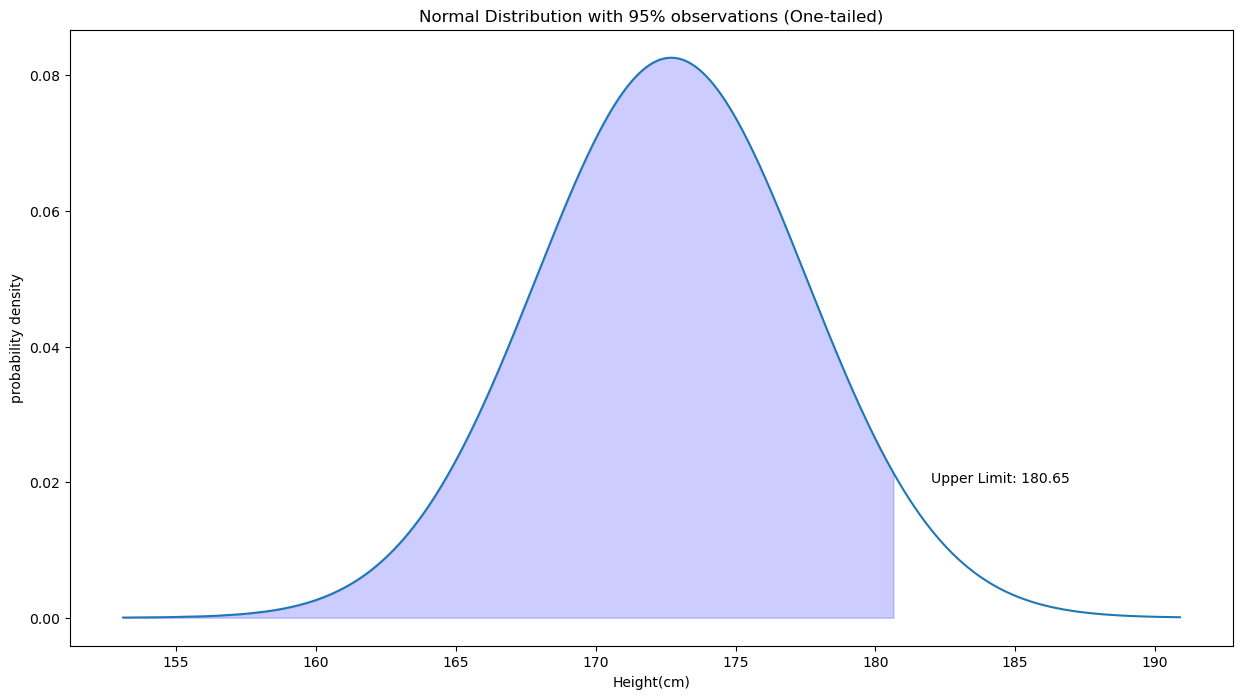

In [111]:
plt.figure(figsize = (15,8))
plt.plot(x,fx) #plot the distributiond
plt.fill_between(x, fx, where = (x <= (mean + 1.6448 * std_dev)) , color = "blue", alpha = 0.2 )
plt.xlabel('Height(cm)')
plt.ylabel('probability density')
plt.title('Normal Distribution with 95% observations (One-tailed)')
plt.text(182, 0.02, f'Upper Limit: {round((mean + 1.6448 * std_dev),2)}')

print(f' Uppper Limit: {round((mean + 1.6448 * std_dev),2)}cm')

#### Example 2 : Two-tailed test for 95% observations
Returns a 95% significance interval for a one-tail test on a standard normal distribution (i.e. a special case of the normal distribution where the mean is 0 and the standard deviation is 1).

This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% of data points would be contained if our data is a normal distribution.

In [44]:
stats.norm.ppf(0.975, loc=0, scale=1)

1.959963984540054

 Lower Limit: 163.24cm
 Uppper Limit: 182.17cm


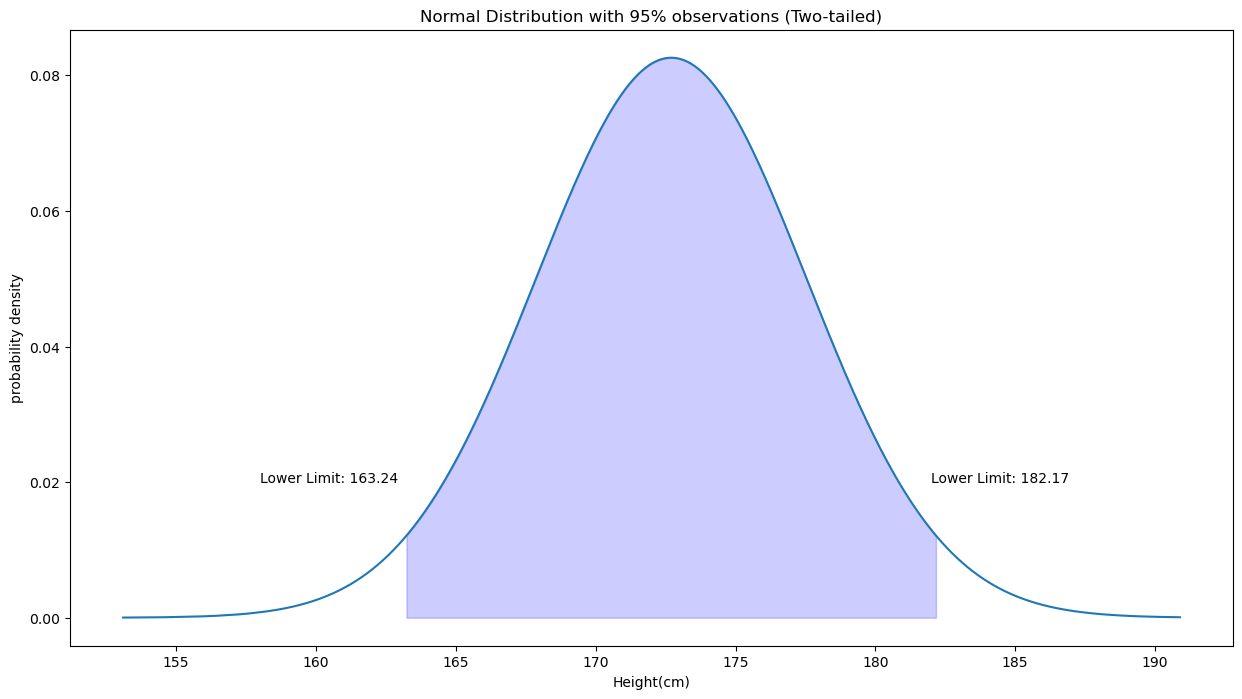

In [90]:
plt.figure(figsize = (15,8))
plt.plot(x,fx) #plot the distributiond
plt.fill_between(x, fx, where = (x >= (mean - 1.959963 * std_dev)) & (x <= (mean + 1.959963 * std_dev)) , color = "blue", alpha = 0.2 )
plt.xlabel('Height(cm)')
plt.ylabel('probability density')
plt.title('Normal Distribution with 95% observations (Two-tailed)')
plt.text(158, 0.02, f'Lower Limit: {round(mean - 1.959963 * std_dev,2)}')
plt.text(182, 0.02, f'Lower Limit: {round(mean + 1.959963 * std_dev,2)}')

print(f' Lower Limit: {round(mean - 1.959963 * std_dev,2)}cm')
print(f' Uppper Limit: {round(mean + 1.959963 * std_dev,2)}cm')

# Relationship between Standard Deviation and Confidence Interval

As a rule: \
Bell-shaped curve with the standard deviations equally distributed on the x-axis. 99.7% of the data falls between the minus 3 and plus 3 standard deviation. 95.5% of the data falls between the minus 2 and plus 2 standard deviation. 68.3% of the data falls between the minus 1 and plus 1 standard deviations.

In summary: \
±1 SD includes 68.3%\
±1.96 SD includes 95.0%\
±2 SD includes 95.5%\
±3 SD includes 99.7%

#### Normal Distribution with different Standard Deviation

Text(178, 0.05, 'Upper Limit: 177.53')

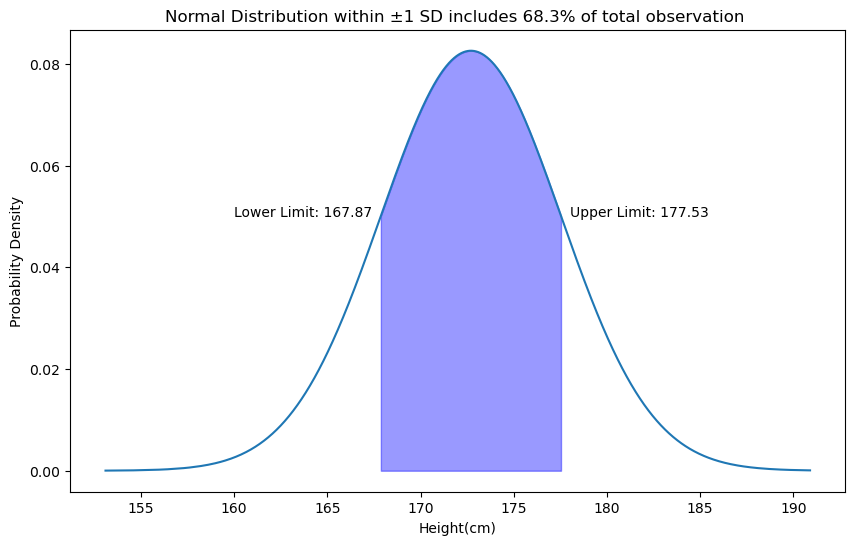

In [103]:
# Normal Distribution within ±1 SD
plt.figure(figsize = (10,6))
plt.plot(x,fx) 
plt.fill_between(x, fx, where = (x >= mean -std_dev) & (x <= mean + std_dev) , color = "blue", alpha = 0.4 )
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.title('Normal Distribution within ±1 SD includes 68.3% of total observation ')
plt.text(160, 0.05, f'Lower Limit: {round(mean - 1 * std_dev,2)}')
plt.text(178, 0.05, f'Upper Limit: {round(mean + 1 * std_dev,2)}')

Text(182, 0.015, 'Upper Limit: 182.36')

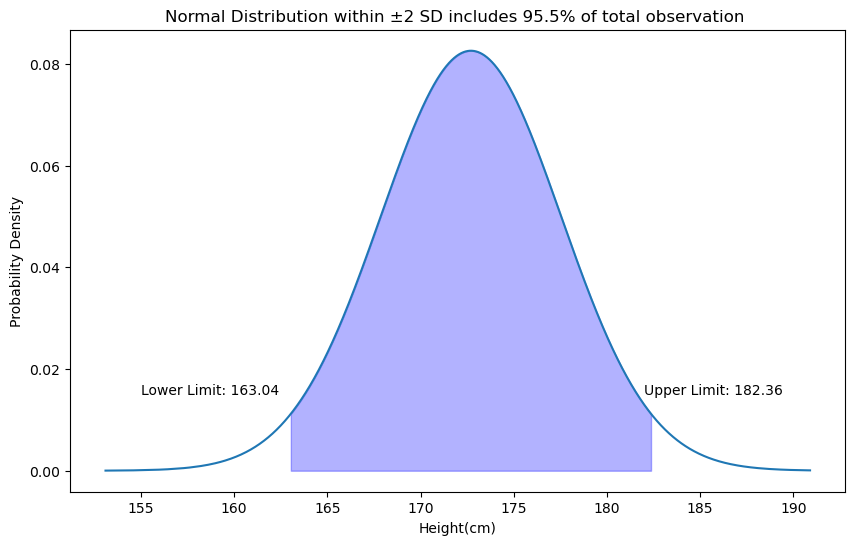

In [104]:
# Normal Distribution within ±2 SD
plt.figure(figsize = (10,6))
plt.plot(x,fx) 
plt.fill_between(x, fx, where = (x >= mean - 2 * std_dev) & (x <= mean + 2 * std_dev)  , color = "blue", alpha = 0.3 )
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.title('Normal Distribution within ±2 SD includes 95.5% of total observation ')
plt.text(155, 0.015, f'Lower Limit: {round(mean - 2 * std_dev,2)}')
plt.text(182, 0.015, f'Upper Limit: {round(mean + 2 * std_dev,2)}')

Text(188, 0.005, 'Upper Limit: 187.19')

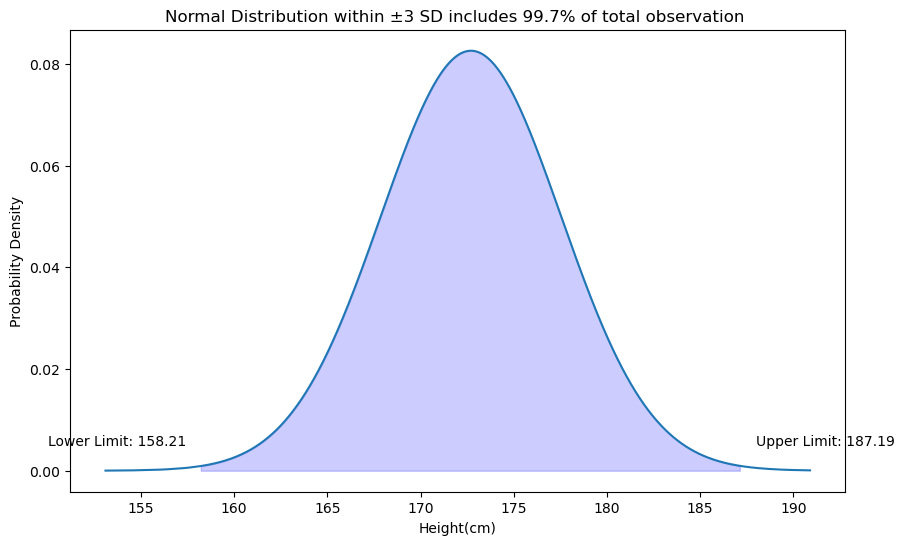

In [105]:
# Normal Distribution within ±3 SD
plt.figure(figsize = (10,6))
plt.plot(x,fx) 
plt.fill_between(x, fx, where = (x >= mean - 3 * std_dev) & (x <= mean + 3 * std_dev)  , color = "blue", alpha = 0.2 )
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.title('Normal Distribution within ±3 SD includes 99.7% of total observation ')
plt.text(150, 0.005, f'Lower Limit: {round(mean - 3 * std_dev,2)}')
plt.text(188, 0.005, f'Upper Limit: {round(mean + 3 * std_dev,2)}')

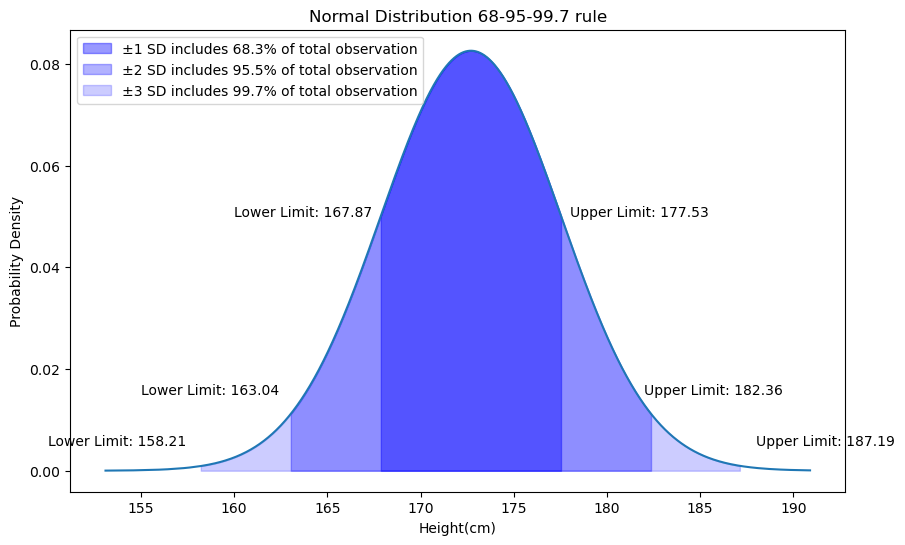

In [112]:
# Normal Distribution 68-95-99.7 rule

plt.figure(figsize = (10,6))
plt.plot(x,fx) 
plt.fill_between(x, fx, where = (x >= mean - 1 * std_dev) & (x <= mean + 1 * std_dev)  , color = "blue", alpha = 0.4 , label = '±1 SD includes 68.3% of total observation')
plt.fill_between(x, fx, where = (x >= mean - 2 * std_dev) & (x <= mean + 2 * std_dev)  , color = "blue", alpha = 0.3 , label = '±2 SD includes 95.5% of total observation')
plt.fill_between(x, fx, where = (x >= mean - 3 * std_dev) & (x <= mean + 3 * std_dev)  , color = "blue", alpha = 0.2 , label = '±3 SD includes 99.7% of total observation')
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.title('Normal Distribution 68-95-99.7 rule')
plt.text(160, 0.05, f'Lower Limit: {round(mean - 1 * std_dev,2)}')
plt.text(178, 0.05, f'Upper Limit: {round(mean + 1 * std_dev,2)}')
plt.text(155, 0.015, f'Lower Limit: {round(mean - 2 * std_dev,2)}')
plt.text(182, 0.015, f'Upper Limit: {round(mean + 2 * std_dev,2)}')
plt.text(150, 0.005, f'Lower Limit: {round(mean - 3 * std_dev,2)}')
plt.text(188, 0.005, f'Upper Limit: {round(mean + 3 * std_dev,2)}')
plt.legend()

# Skewness and Kurtosis

#### scipy.stats.skew
scipy.stats.skew compute the sample skewness of a data set.

For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to zero, statistically speaking.

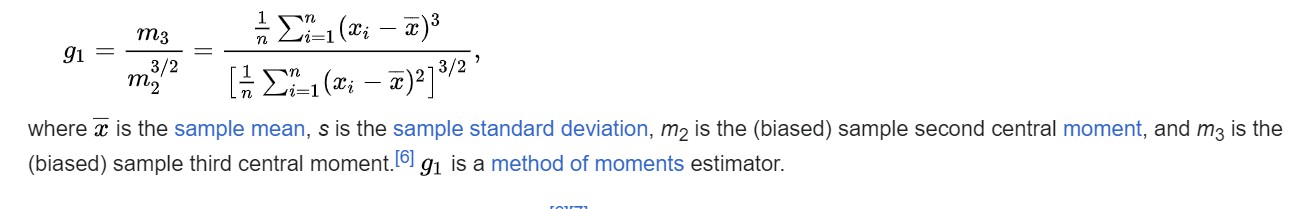

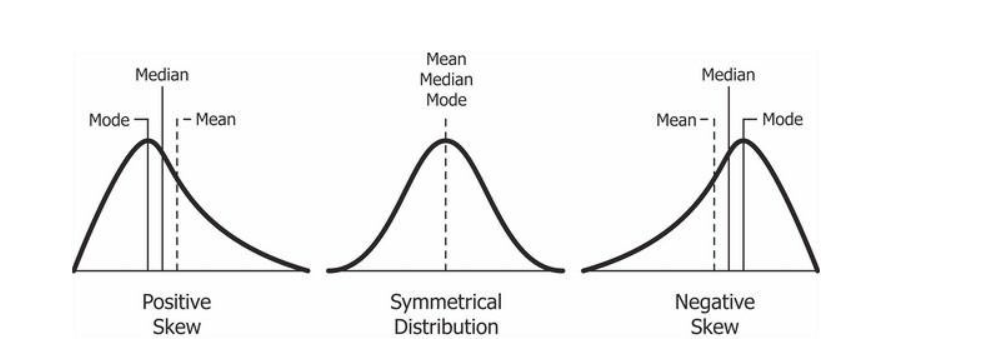

In [117]:
# compute skewness

stats.skew(x)

-0.005657639882555821

#### scipy.stats.kurtosis

scipy.stats.kurtosis compute the kurtosis (Fisher or Pearson) of a dataset.

Kurtosis is a statistical term that characterizes frequency distribution. Aside from determining if a distribution is heavy-tailed, it also provides insight into the shape of the frequency distribution. Kurtosis (Pearson's definition) is the fourth central moment divided by the square of the variance. If Fisher’s definition is used, then 3.0 is subtracted from the result to give 0.0 for a normal distribution.



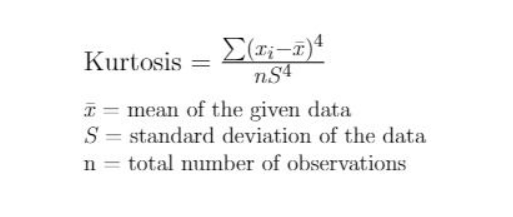

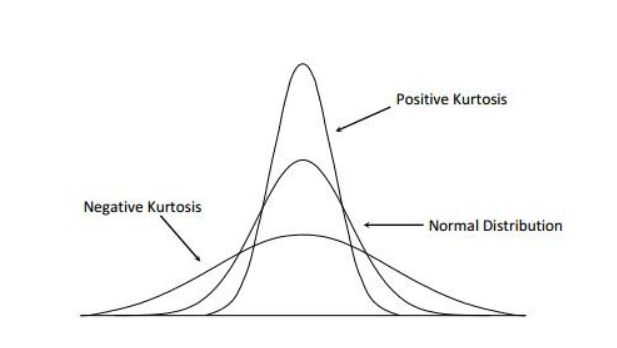

In [116]:
# compute kurtosis

stats.kurtosis(x)

-0.03539236835810833